Screen your home for potential fire damage!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("../DATASETS/thecaldataset/damagepred.csv")
pd.set_option('display.max_columns', 50) #allow u to scroll farther right
display(df)

/var/folders/15/6rx1884j37vf9fz_lh6lmnx40000gn/T/ipykernel_72256/2917318374.py:4: DtypeWarning: Columns (13,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../DATASETS/thecaldataset/damagepred.csv")


,_id,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,* CAL FIRE Unit,County,Community,Battalion,* Incident Name,Incident Number (e.g. CAAEU 123456),Incident Start Date,Hazard Type,If Affected 1-9% - Where did fire start?,If Affected 1-9% - What started fire?,Structure Defense Actions Taken,* Structure Type,Structure Category,# Units in Structure (if multi unit),# of Damaged Outbuildings < 120 SQFT,# of Non Damaged Outbuildings < 120 SQFT,* Roof Construction,* Eaves,* Vent Screen,* Exterior Siding,* Window Pane,* Deck/Porch On Grade,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,1,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,8.0,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Multi Story,Single Residence,1.0,NaN,NaN,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Single Pane,Wood,Wood,No Patio Cover/Carport,No Fence,NaN,NaN,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
1,2,2,Affected (1-9%),8402.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,NaN,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,Deck on Grade,Unknown,Hand Crew Fuel Break,Single Family Residence Single Story,Single Residence,NaN,NaN,NaN,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Multi Pane,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,Combustible,NaN,NaN,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06
2,3,3,No Damage,8430.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,NaN,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Single Story,Single Residence,NaN,NaN,NaN,Asphalt,Enclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Deck/Porch,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,Quail,0101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06
3,4,4,No Damage,3838.0,Putah Creek,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,NaN,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Single Story,Single Residence,NaN,NaN,NaN,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Deck/Porch,No Deck/Porch,Combustible,No Fence,NaN,NaN,Quail,0103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06
4,5,5,No Damage,3830.0,Putah Creek,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,NaN,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Single Story,Single Residence,NaN,NaN,NaN,Tile,Enclosed,"Mesh Screen > 1/8""""",Wood,Multi Pane,Wood,Wood,Combustible,No Fence,NaN,NaN,Quail,0103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100225,100226,101217,No Damage,24198.0,Case,Court,blding A,Malibu,CA,90265.0,LAC,Los Angeles,NaN,NaN,Franklin,CALAC 434928,12/9/2024 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Single Story,Single Residence,0.0,0.0,0.0,Metal,Enclosed,Unknown,Stucco Brick Cement,Multi Pane,Wood,No Deck/Porch,Non Combustible,No Fence,NaN,NaN,NaN,4458018039.0,2249521.0,0.0,"24198 CASE CT, MALIBU, CA 90265",1b537de2-8b

* Damage
Destroyed (>50%)    53879
No Damage           40895
Affected (1-9%)      3438
Minor (10-25%)       1018
Major (26-50%)        564
Inaccessible          436
Name: count, dtype: int64


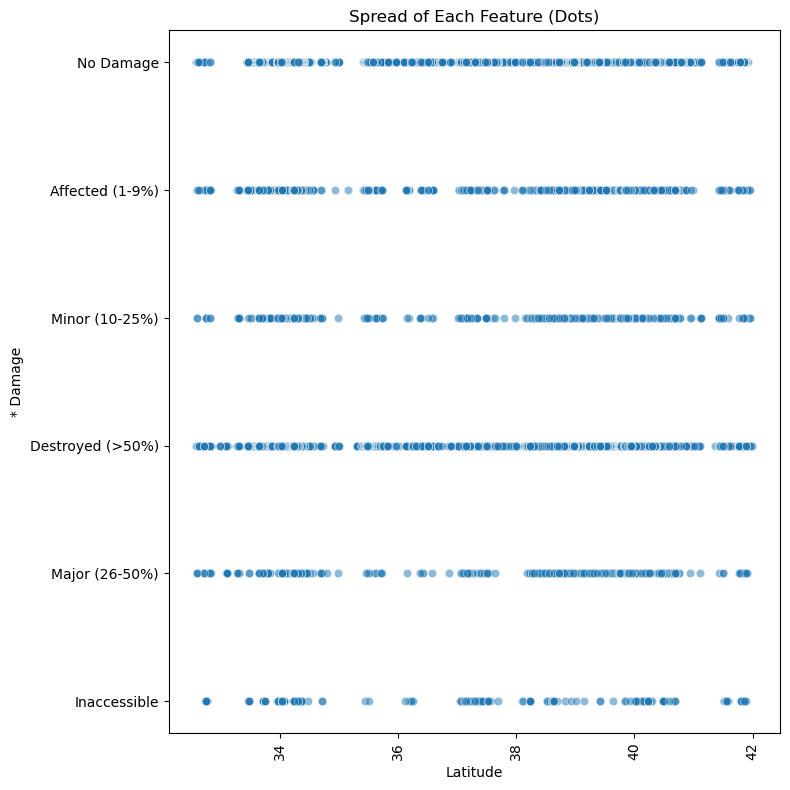

In [45]:
focus_columns = ['Zip Code', '* CAL FIRE Unit', 'Hazard Type', 
       'Structure Defense Actions Taken', '* Structure Type', '# Units in Structure (if multi unit)', '# of Damaged Outbuildings < 120 SQFT', '# of Non Damaged Outbuildings < 120 SQFT', '* Roof Construction',
       '* Eaves', '* Vent Screen', '* Exterior Siding', '* Window Pane',
       '* Deck/Porch On Grade', '* Deck/Porch Elevated',
       '* Patio Cover/Carport Attached to Structure',
       '* Fence Attached to Structure', 'Distance - Propane Tank to Structure',
       'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT', 
       'Assessed Improved Value (parcel)', 'Year Built (parcel)', 'Latitude', 'Longitude', 'x', 'y']

print(df['* Damage'].value_counts())

plt.figure(figsize=(8, 8))
sns.scatterplot(x="Latitude", y="* Damage", data=df, alpha=0.5)
plt.xticks(rotation=90)
plt.title("Spread of Each Feature (Dots)")
plt.tight_layout()
plt.show()

In [ ]:
df = df[df["* Damage"] != "Inaccessible"] #remove rows with no damage evaluation

X = df[focus_columns]
X_encoded = pd.get_dummies(X, drop_first=True)
y = df['* Damage']
y_encoded = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

After trying different (Random Forest, Gradient, MLP) classifiers to see which one best suits our needs, the RandomForestClassifier suited the situation best due to quick train time and high accuracy.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate the classifier with a confusion matrix and accuracy

              precision    recall  f1-score   support

           0       0.60      0.21      0.32       664
           1       0.35      0.06      0.11       173
           2       0.94      0.96      0.95     10848
           3       0.26      0.05      0.08       100
           4       0.93      0.98      0.95      8174

    accuracy                           0.93     19959
   macro avg       0.62      0.45      0.48     19959
weighted avg       0.92      0.93      0.92     19959



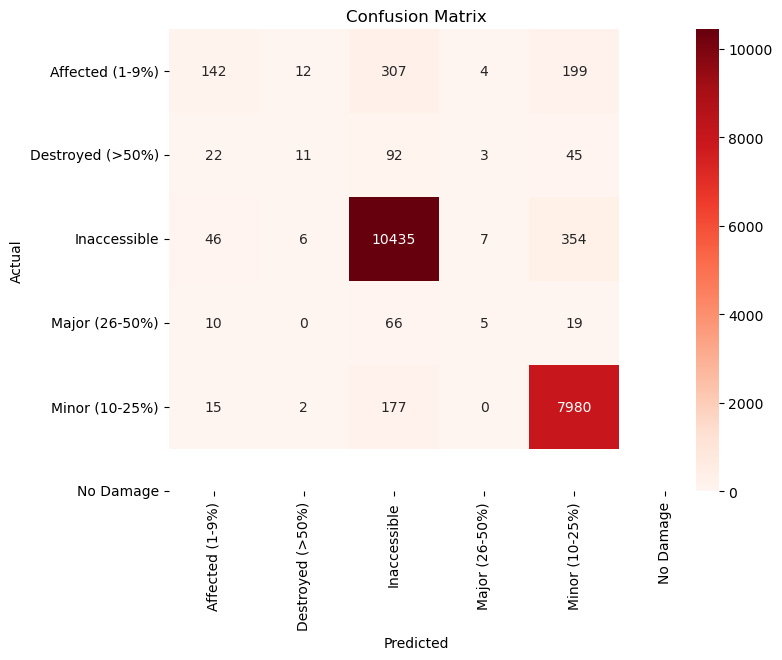

Accuracy: 0.931


In [ ]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.3f}")

Therefore since it performed best, we should export the __ model for our application.

In [56]:
import joblib
joblib.dump(clf, "classifymodel.joblib")  # Save the model to a file

['classifymodel.joblib']

Lets try again with better grouped data

In [ ]:
damage_map = {
    'Affected (1-9%)': 'Damaged (1-50%)',
    'Major (26-50%)': 'Damaged (1-50%)',
    'Minor (10-25%)': 'Damaged (1-50%)',
}
df['* Damage'] = df['* Damage'].replace(damage_map)
print(df['* Damage'].value_counts())


* Damage
Destroyed (>50%)    53879
No Damage           40895
Damaged (1-50%)      5020
Name: count, dtype: int64


In [49]:
X = df[focus_columns]
X_encoded = pd.get_dummies(X, drop_first=True)
y = df['* Damage']
y_encoded = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
clf_2 = RandomForestClassifier(random_state=42)
clf_2.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

93.2% accuracy with better grouped data

              precision    recall  f1-score   support

           0       0.67      0.27      0.38       937
           1       0.94      0.96      0.95     10848
           2       0.93      0.97      0.95      8174

    accuracy                           0.93     19959
   macro avg       0.85      0.73      0.76     19959
weighted avg       0.93      0.93      0.92     19959



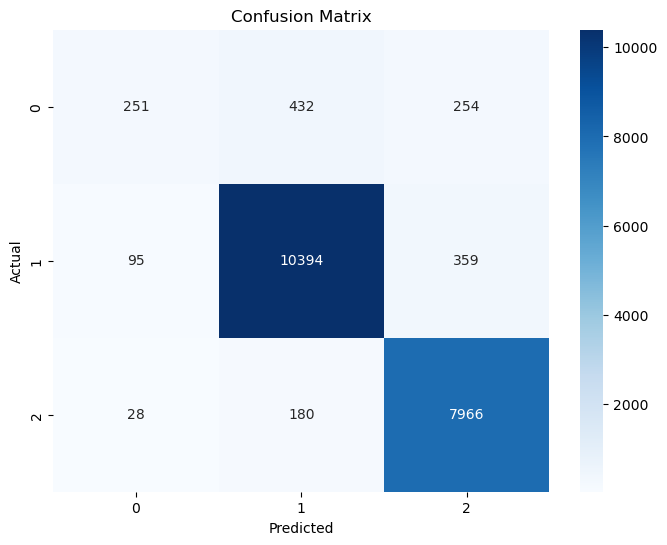

Accuracy: 0.932


In [54]:
predictions_2 = clf_2.predict(X_test)

print(classification_report(y_test, predictions_2))

cm = confusion_matrix(y_test, predictions_2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, predictions_2)
print(f"Accuracy: {accuracy:.3f}")

In [ ]:
joblib.dump(clf_2, "classifymodel_2.joblib")  #save to file

['classifymodel_2.joblib']